In [ ]:
import pandas as pd
# load data
df = pd.read_csv('ToyotaCorolla - MLR.csv')
# Display the first few rows of the dataframe
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
# displaying statistics of the dataframe
display(df.describe())
display(df.describe(include='object'))

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


,Fuel_Type
count,1436
unique,3
top,Petrol
freq,1264


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

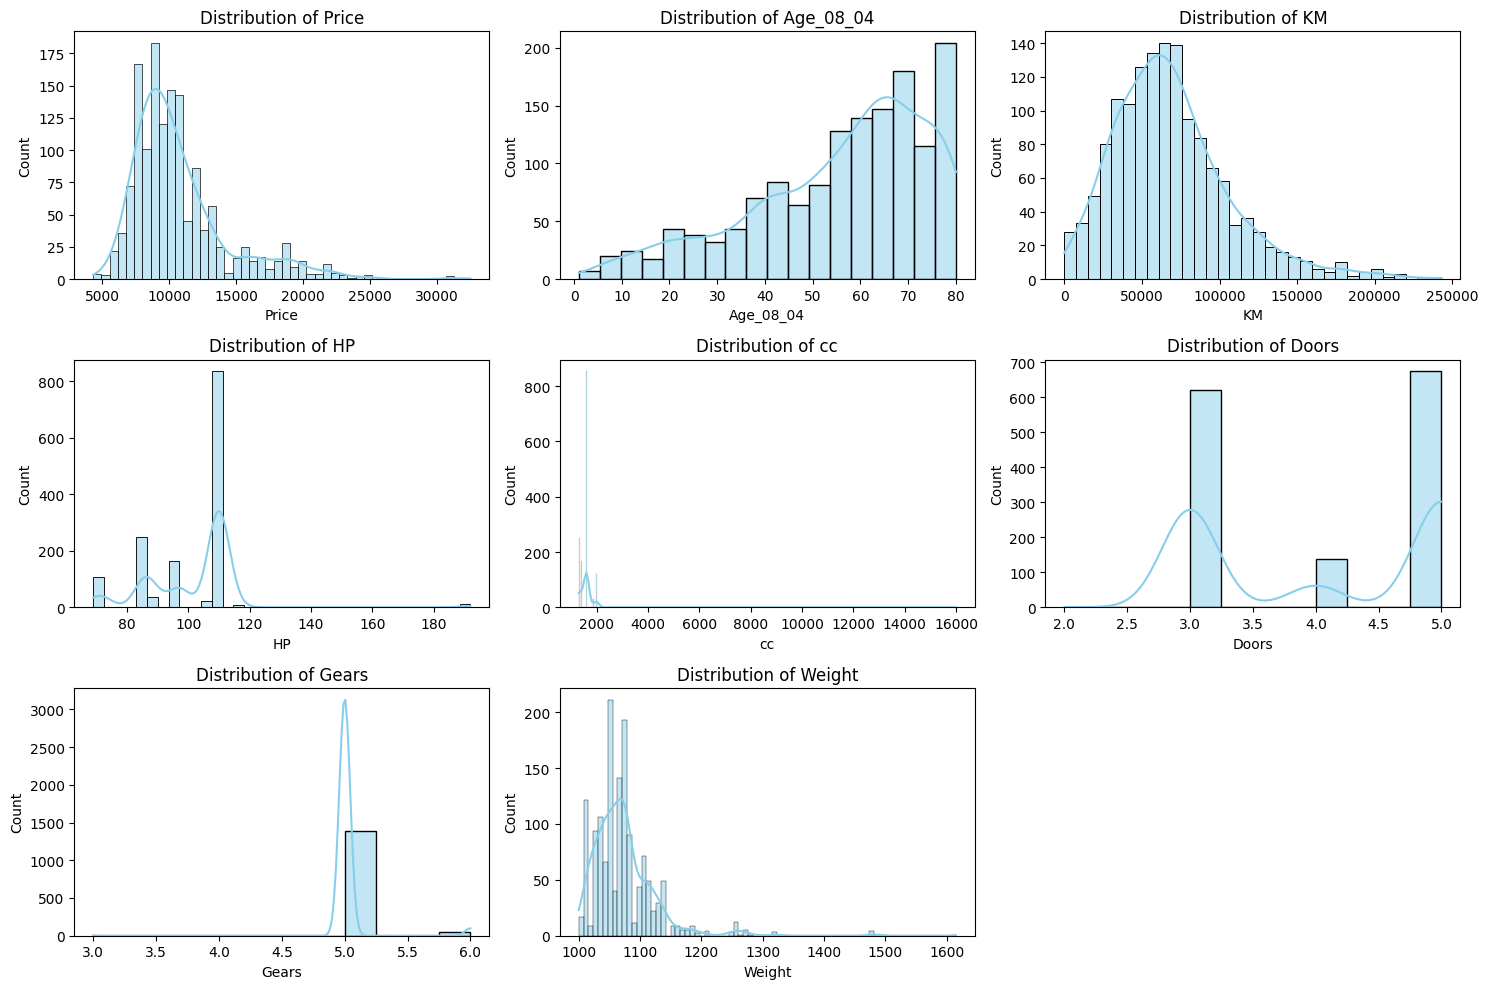

In [ ]:
# Visualizing the distribution of numerical features
numerical_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']

plt.figure(figsize=(15, 10))
# crating the histograms for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True,color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

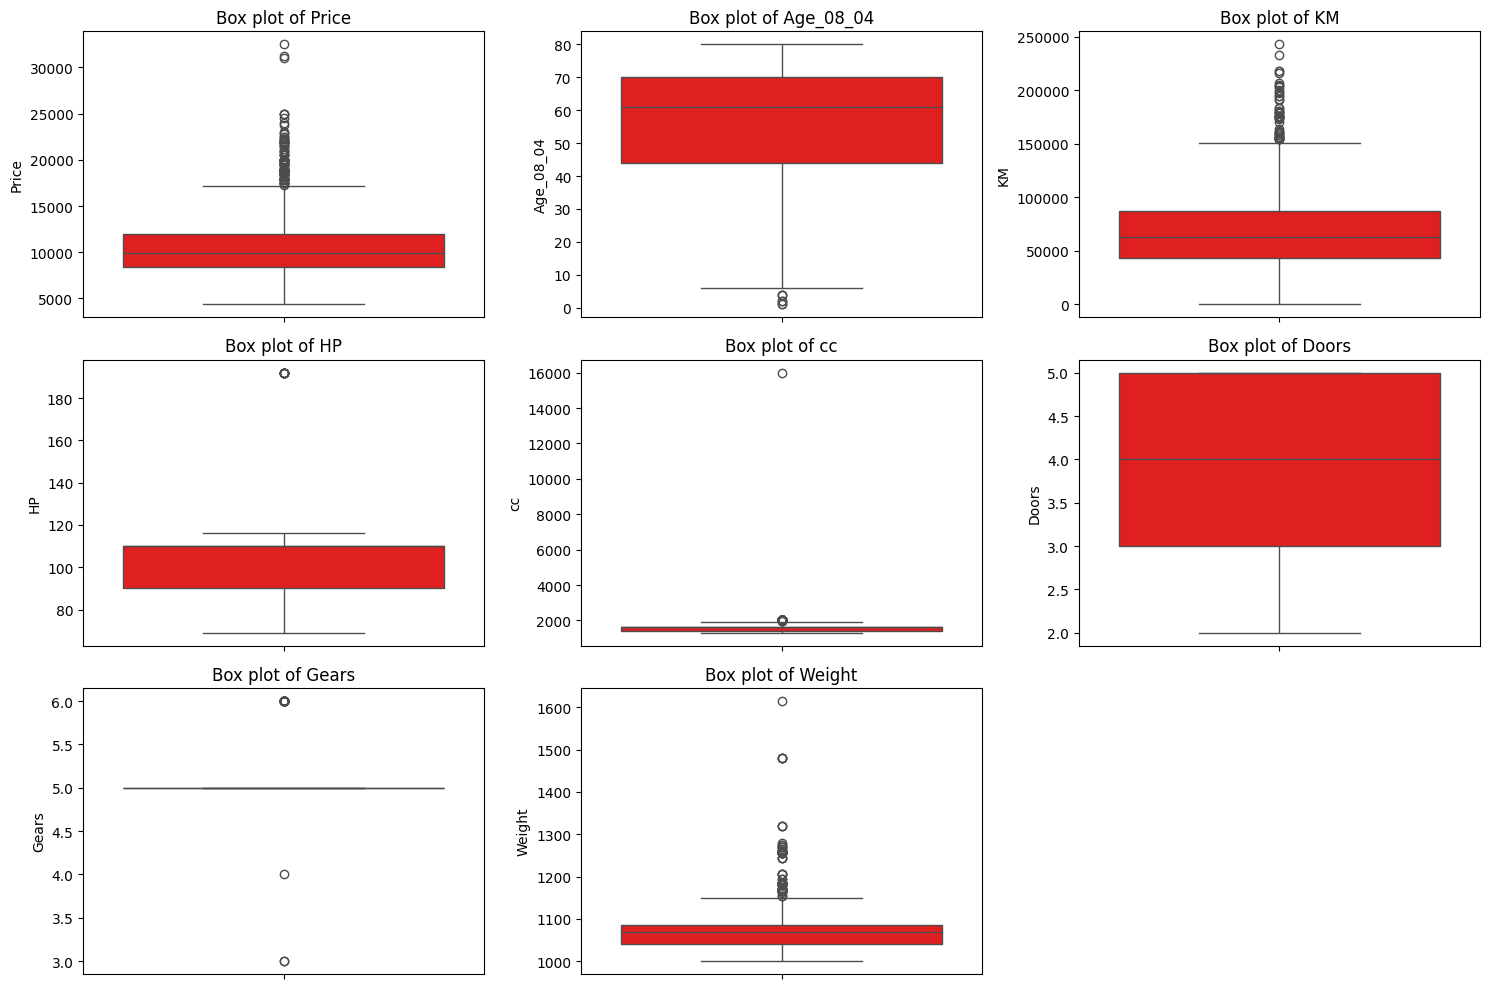

In [ ]:
# Visualizing the box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col],color = 'Red')
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

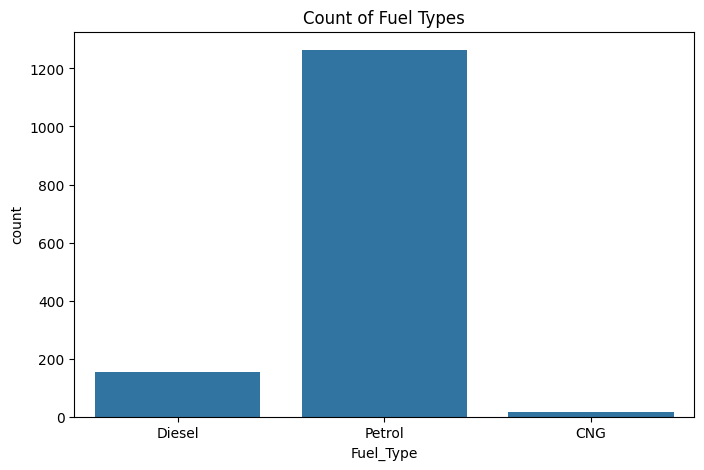

In [ ]:
# Visualizing the count of categorical features
plt.figure(figsize=(8, 5))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Count of Fuel Types')
plt.show()

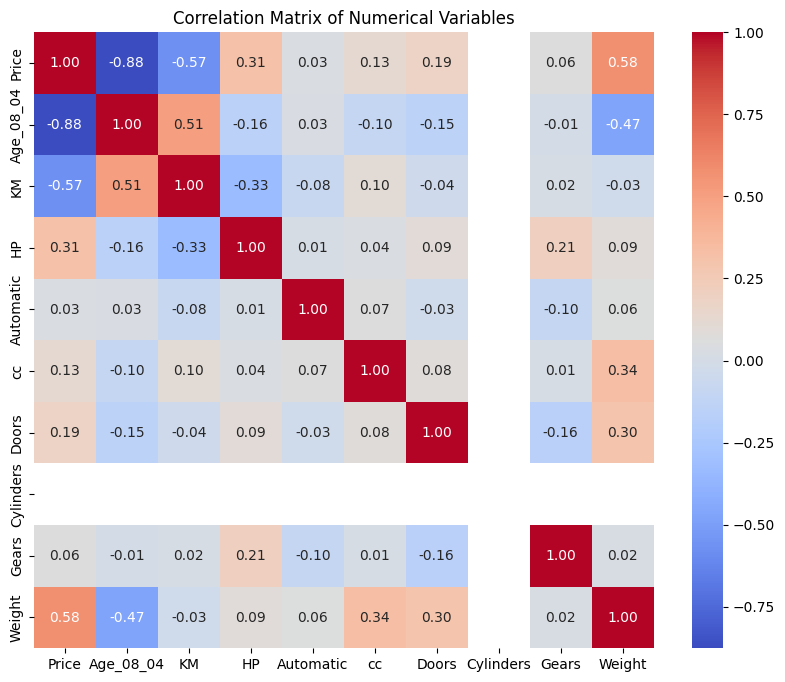

In [ ]:
# Visualizing the correlation matrix of numerical features
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [ ]:
# Converting categorical variable 'Fuel_Type' into dummy variables
fuel_type_dummies = pd.get_dummies(df['Fuel_Type'], prefix='Fuel_Type', drop_first=True)
df = pd.concat([df, fuel_type_dummies], axis=1)
df = df.drop('Fuel_Type', axis=1)
display(df.head())

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


In [ ]:
# Selecting features and target variable
feature_columns = df.drop(['Price', 'Cylinders'], axis=1).columns
features = df[feature_columns]
display(features.head())

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,True,False
1,23,72937,90,0,2000,3,5,1165,True,False
2,24,41711,90,0,2000,3,5,1165,True,False
3,26,48000,90,0,2000,3,5,1165,True,False
4,30,38500,90,0,2000,3,5,1170,True,False


In [ ]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Define the target variable and features
y = df['Price']
X = features
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1148, 10)
X_test shape: (288, 10)
y_train shape: (1148,)
y_test shape: (288,)


In [ ]:
# Importing the Linear Regression model
from sklearn.linear_model import LinearRegression
# Creating and training the Linear Regression model
model = LinearRegression()
# Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Displaying the model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01  5.51600710e+02  2.58849583e+01
 -6.85487568e+01  1.37080891e+03]
Model Intercept: -14255.385993565218


In [ ]:
# Making predictions on the test set and evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
# Predicting the target variable for the test set
y_pred = model.predict(X_test)
# Calculating the Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Displaying the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 2203043.8231437
R-squared (R2): 0.8348888040611084


In [ ]:
# Importing the Lasso regression model
from sklearn.linear_model import Lasso
# Creating and training the Lasso regression model
# Setting the regularization parameter alpha
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [ ]:
# Making predictions with the Lasso model and evaluating its performance
from sklearn.metrics import mean_squared_error, r2_score
# Predicting the target variable for the test set using Lasso model
y_pred_lasso = lasso_model.predict(X_test)
# Calculating the Mean Squared Error (MSE) and R-squared (R2) score for Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
# Displaying the evaluation metrics for Lasso model
print(f"Lasso Model Mean Squared Error (MSE): {mse_lasso}")
print(f"Lasso Model R-squared (R2): {r2_lasso}")

Lasso Model Mean Squared Error (MSE): 2195387.246086539
Lasso Model R-squared (R2): 0.8354626403967389


In [ ]:
# Importing the Ridge regression model
from sklearn.linear_model import Ridge
# Creating and training the Ridge regression model
# Setting the regularization parameter alpha
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Making predictions with the Ridge model and evaluating its performance
from sklearn.metrics import mean_squared_error, r2_score
# Predicting the target variable for the test set using Ridge model
y_pred_ridge = ridge_model.predict(X_test)
# Calculating the Mean Squared Error (MSE) and R-squared (R2) score for Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
# Displaying the evaluation metrics for Ridge model
print(f"Ridge Model Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge Model R-squared (R2): {r2_ridge}")

Ridge Model Mean Squared Error (MSE): 2199746.37023334
Ridge Model R-squared (R2): 0.8351359377712335


In [ ]:
# Comparing the performance of Linear Regression, Lasso Regression, and Ridge Regression
print("--- Model Performance Comparison ---")
print(f"Linear Regression - MSE: {mse:.2f}, R2: {r2:.4f}")
print(f"Lasso Regression - MSE: {mse_lasso:.2f}, R2: {r2_lasso:.4f}")
print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R2: {r2_ridge:.4f}")
# Interpretation of the results
print("\nInterpretation:")
print("Lower MSE indicates better prediction accuracy.")
print("Higher R2 indicates that a larger proportion of the variance in the target variable is explained by the model.")
print("\nComparison:")
# Comparing the MSE and R2 scores of the three models
if mse_lasso < mse and mse_lasso < mse_ridge:
    print("Lasso Regression has the lowest MSE, suggesting slightly better prediction accuracy.")
elif mse_ridge < mse and mse_ridge < mse_lasso:
    print("Ridge Regression has the lowest MSE, suggesting slightly better prediction accuracy.")
else:
    print("Linear Regression has a comparable or slightly lower MSE.")
# Comparing the R2 scores of the three models
if r2_lasso > r2 and r2_lasso > r2_ridge:
    print("Lasso Regression has the highest R2, indicating it explains slightly more variance in the target variable.")
elif r2_ridge > r2 and r2_ridge > r2_lasso:
    print("Ridge Regression has the highest R2, indicating it explains slightly more variance in the target variable.")
else:
    print("Linear Regression has a comparable or slightly higher R2.")

print("\nOverall, all three models perform similarly based on these metrics, with slight variations in MSE and R2.")

--- Model Performance Comparison ---
Linear Regression - MSE: 2203043.82, R2: 0.8349
Lasso Regression - MSE: 2195387.25, R2: 0.8355
Ridge Regression - MSE: 2199746.37, R2: 0.8351

Interpretation:
Lower MSE indicates better prediction accuracy.
Higher R2 indicates that a larger proportion of the variance in the target variable is explained by the model.

Comparison:
Lasso Regression has the lowest MSE, suggesting slightly better prediction accuracy.
Lasso Regression has the highest R2, indicating it explains slightly more variance in the target variable.

Overall, all three models perform similarly based on these metrics, with slight variations in MSE and R2.


## Summary:

*   While Lasso showed a slight edge in performance metrics, the differences between the three models are minimal. Further analysis could involve hyperparameter tuning (e.g., the `alpha` value) for Lasso and Ridge regression to potentially improve their performance.
*   Given the similar performance of all three models, exploring regularization paths and the impact of different `alpha` values on coefficient shrinkage could provide deeper insights into feature importance and model stability.


**What is Normalization & Standardization and how is it helpful?**

**Normalization & Standardization**

Both are techniques to rescale features before applying machine learning models, especially models sensitive to feature scales (like regression, KNN, SVM, neural networks).

**Normalization (Min-Max Scaling)**

 Rescales the values of a feature to a fixed range, typically [0, 1].

**Standardization (Z-Score Scaling)**

 Transforms data to have mean = 0 and standard deviation = 1.

* Prevents features with large values from dominating the model.

* Improves training stability and convergence speed in gradient-based methods.

* Ensures fair comparison between coefficients in regression.

* Reduces numerical instability in matrix operations.


**2.What techniques can be used to address multicollinearity in multiple linear regression?**

Multicollinearity is when independent variables are highly correlated with each other, making it hard to interpret coefficients.

**Techniques:**

**1.Remove highly correlated predictors**

Drop one of the variables that shows high correlation (correlation coefficient > 0.8 usually signals concern).

**2.Principal Component Analysis (PCA)**

Combine correlated features into uncorrelated principal components, then use them in regression.

**3.Regularization methods**

Ridge Regression (L2): Shrinks coefficients, reduces variance caused by multicollinearity.

Lasso Regression (L1): Performs feature selection by driving some coefficients to zero.

**4.Variance Inflation Factor (VIF) check**

Calculate VIF for predictors. If VIF > 10, consider removing or transforming that variable.

**5.Domain knowledge feature selection**

Keep only the most meaningful features based on business/domain understanding.